# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling as pp
import seaborn as sns

# Data Exploration

In [2]:
# importing dataset using pandas

dataset = pd.read_csv('../input/housesalesprediction/kc_house_data.csv')
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
dataset.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [4]:
# The columns
categorical = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']
continous = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

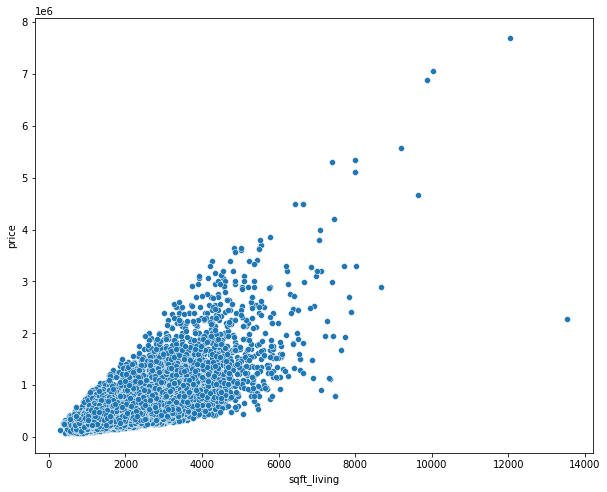

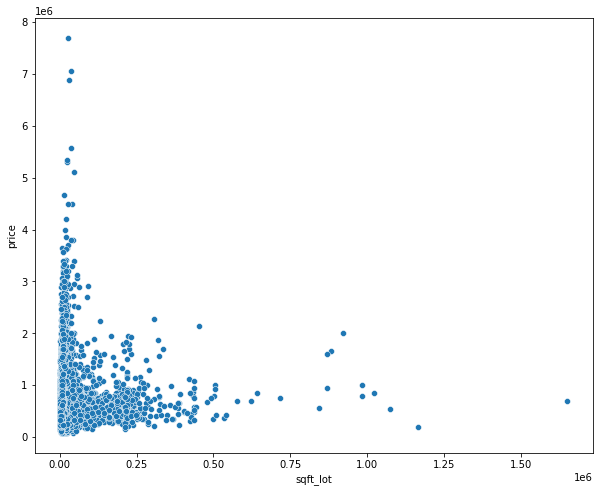

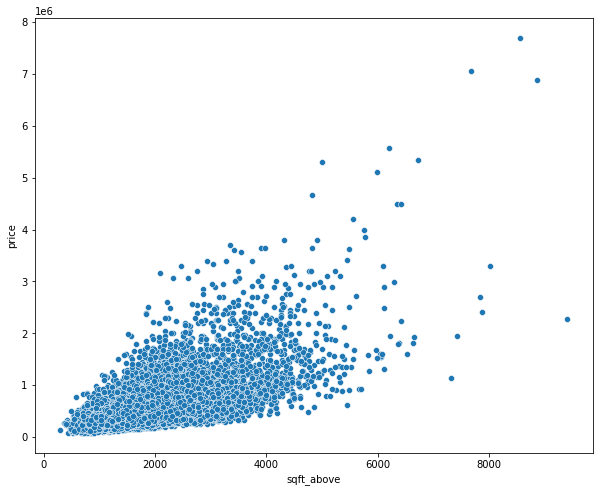

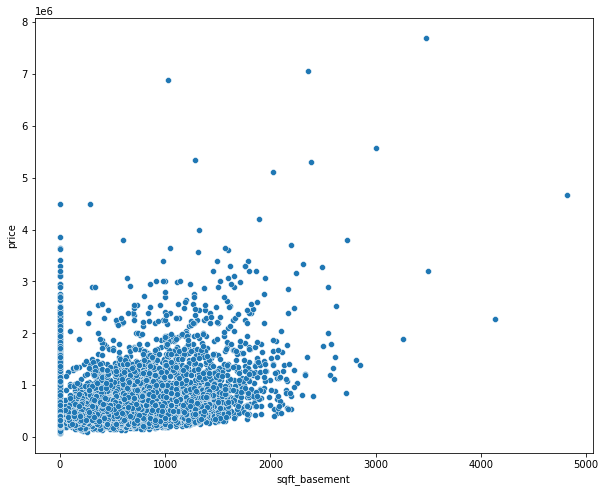

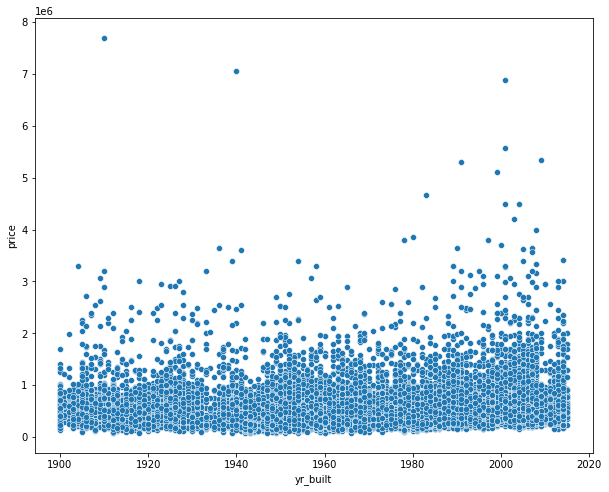

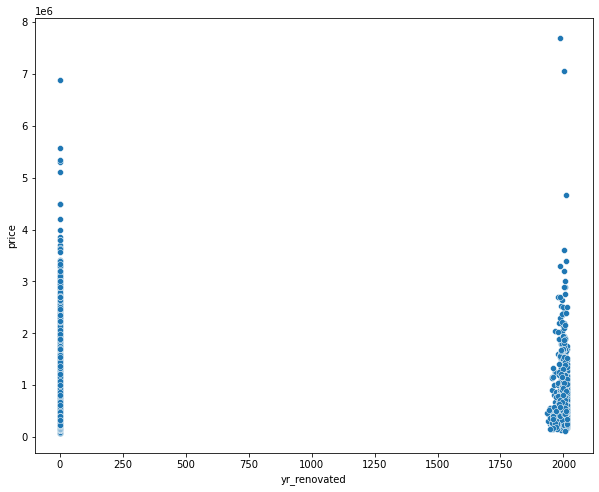

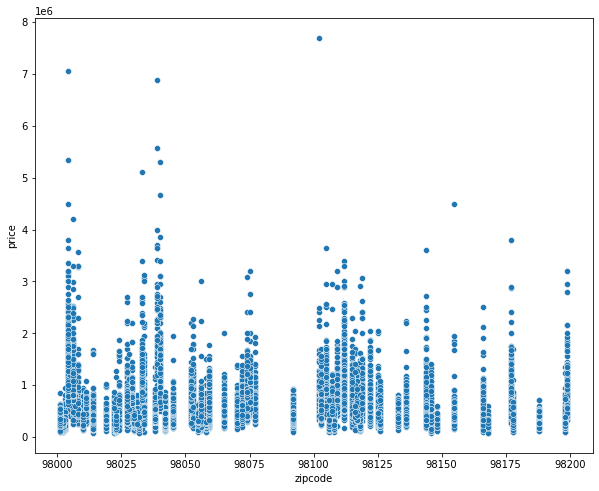

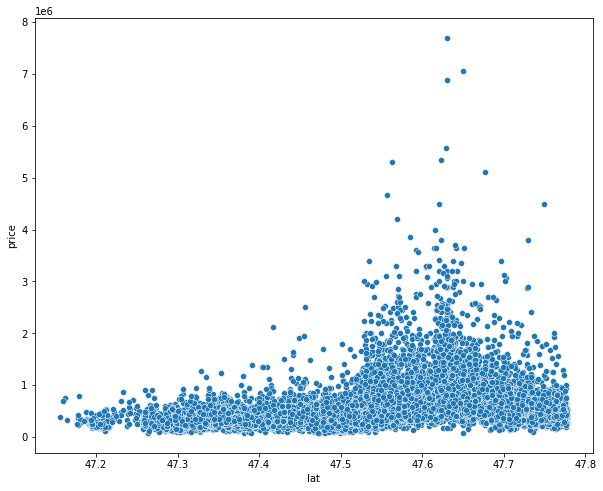

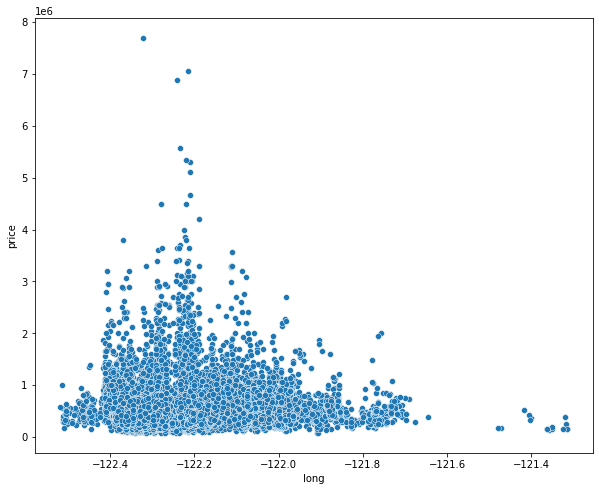

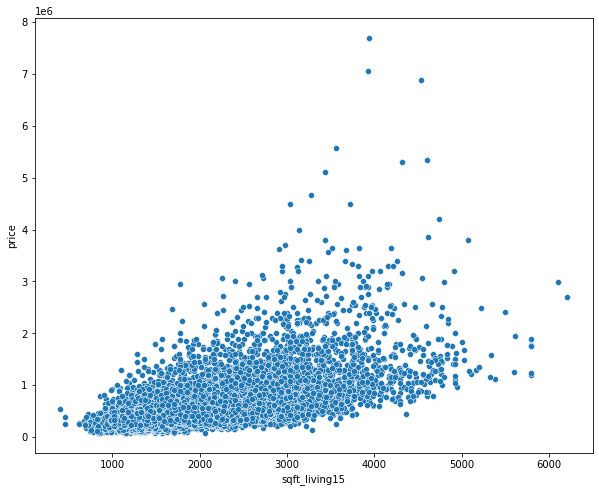

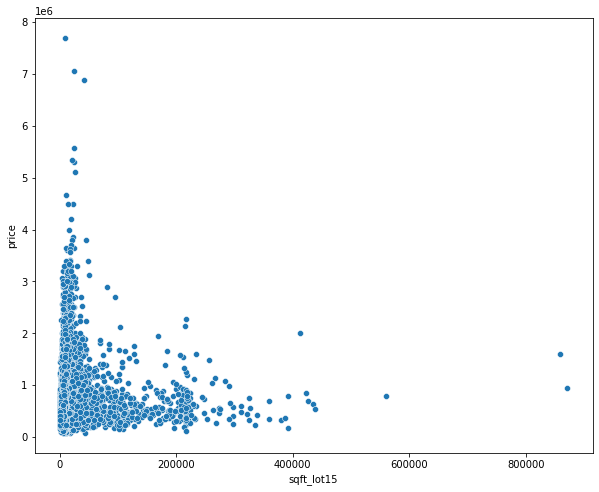

In [5]:
for column_name in continous:
    plt.figure(figsize=(10,8))
    sns.scatterplot(x=column_name, y='price', data=dataset)

In [6]:
#finding unique value in a column
#dataset.bathrooms.unique()

In [7]:
#report = pp.ProfileReport(dataset, title='House dataset Report', progress_bar=False)
#report

# Data Preprocessing

In [8]:
# taking features that have high corelation

X = dataset[['bedrooms','bathrooms','sqft_living','floors','waterfront','view','grade','sqft_above','sqft_basement','lat','sqft_living15']]
y = dataset[['price']]

In [9]:
# splitting the dataset 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 2)

# Making a Model

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression()

# Prediction

In [11]:
y_pred = regressor.predict(poly_reg.transform(X_test))

In [12]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7565319291321513